# Reference

- [`Full Algorithmic Trading Course`](https://www.youtube.com/watch?v=qkyvj5LIg0M&list=PLtqRgJ_TIq8Y6YG8G-ETIFW_36mvxMLad&index=5)
- [`Algorithmic Trading Using Python - Full Course`](https://www.youtube.com/watch?v=xfzGZB4HhEE)
- [`Algorithmic Trading Python 2023 - FULL TUTORIAL Beginner`](https://www.youtube.com/watch?v=GDMkkmkJigw&t=9s)

# Notes

- workflow:

  1. Idea Generation
  2. Code Implementation
  3. Testing & Optimizing
  4. Live Deployment

- To-Do
  1. Refactor this notebook
  2. Watch Stan Weinstein Strategy and backtest it


In [1]:
# !pip install autopep8
# !conda info
import platform
platform.python_version()

'3.11.5'

In [2]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# plt.style.use('seaborn')

# Load Data & Plot


In [3]:
AAPL = yf.download(
    "AAPL",
    start='2010-01-01',
    end='2023-09-28',
)

[*********************100%%**********************]  1 of 1 completed


In [4]:
AAPL.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66830700


In [5]:
tickers = ['SPY', 'AAPL', 'KO']
start_date = '2010-01-01'
end_date = '2023-09-28'

stocks = yf.download(
    tickers,
    start=start_date,
    end=end_date
)

[*********************100%%**********************]  3 of 3 completed


In [6]:
stocks.head(3)

Adj Close                           Close                         \
                AAPL         KO        SPY      AAPL         KO         SPY   
Date                                                                          
2010-01-04  6.487534  18.645317  87.483185  7.643214  28.520000  113.330002   
2010-01-05  6.498750  18.419762  87.714767  7.656429  28.174999  113.629997   
2010-01-06  6.395379  18.413225  87.776527  7.534643  28.165001  113.709999   

                High                              Low                         \
                AAPL         KO         SPY      AAPL         KO         SPY   
Date                                                                           
2010-01-04  7.660714  28.610001  113.389999  7.585000  28.450001  111.510002   
2010-01-05  7.699643  28.495001  113.680000  7.616071  28.070000  112.849998   
2010-01-06  7.686786  28.219999  113.989998  7.526786  27.990000  113.430000   

                Open                            Volume                       
                AAPL         KO         SPY       AAPL        KO        SPY  
Date                                                                         
2010-01-04  7.622500  28.580000  112.370003  493729600  13870400  118944600  
2010-01-05  7.664286  28.424999  113.260002  601904800  23172400  111579900  
2010-01-06  7.656429  28.174999  113.519997  552160000  19264600  116074400

In [7]:
stocks_fp = os.path.join('data', 'stocksYT.csv')
# stocks.to_csv(stocks_fp)

In [8]:
stocks = pd.read_csv(
    stocks_fp,
    header=[0, 1],
    index_col=[0],
    parse_dates=[0]
)

stocks.head()

Adj Close                           Close                         \
                AAPL         KO        SPY      AAPL         KO         SPY   
Date                                                                          
2010-01-04  6.487534  18.645315  87.483200  7.643214  28.520000  113.330002   
2010-01-05  6.498750  18.419762  87.714783  7.656429  28.174999  113.629997   
2010-01-06  6.395379  18.413223  87.776543  7.534643  28.165001  113.709999   
2010-01-07  6.383556  18.367462  88.147049  7.520714  28.094999  114.190002   
2010-01-08  6.425995  18.027510  88.440399  7.570714  27.575001  114.570000   

                High                              Low                         \
                AAPL         KO         SPY      AAPL         KO         SPY   
Date                                                                           
2010-01-04  7.660714  28.610001  113.389999  7.585000  28.450001  111.510002   
2010-01-05  7.699643  28.495001  113.680000  7.616071  28.070000  112.849998   
2010-01-06  7.686786  28.219999  113.989998  7.526786  27.990000  113.430000   
2010-01-07  7.571429  28.184999  114.330002  7.466071  27.875000  113.180000   
2010-01-08  7.571429  27.820000  114.620003  7.466429  27.375000  113.660004   

                Open                            Volume                       
                AAPL         KO         SPY       AAPL        KO        SPY  
Date                                                                         
2010-01-04  7.622500  28.580000  112.370003  493729600  13870400  118944600  
2010-01-05  7.664286  28.424999  113.260002  601904800  23172400  111579900  
2010-01-06  7.656429  28.174999  113.519997  552160000  19264600  116074400  
2010-01-07  7.562500  28.165001  113.500000  477131200  13234600  131091100  
2010-01-08  7.510714  27.730000  113.889999  447610800  28712400  126402800

In [9]:
stocks.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',   'KO'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',   'KO'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',   'KO'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',   'KO'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',   'KO'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',   'KO'),
            (   'Volume',  'SPY')],
           )

In [10]:
# convert multi-index to tuple
stocks.columns = stocks.columns.to_flat_index()
stocks.head(3)

,"(Adj Close, AAPL)","(Adj Close, KO)","(Adj Close, SPY)","(Close, AAPL)","(Close, KO)","(Close, SPY)","(High, AAPL)","(High, KO)","(High, SPY)","(Low, AAPL)","(Low, KO)","(Low, SPY)","(Open, AAPL)","(Open, KO)","(Open, SPY)","(Volume, AAPL)","(Volume, KO)","(Volume, SPY)"
Date,,,,,,,,,,,,,,,,,,
2010-01-04,6.487534,18.645315,87.483200,7.643214,28.520000,113.330002,7.660714,28.610001,113.389999,7.585000,28.450001,111.510002,7.622500,28.580000,112.370003,493729600,13870400,118944600
2010-01-05,6.498750,18.419762,87.714783,7.656429,28.174999,113.629997,7.699643,28.495001,113.680000,7.616071,28.070000,112.849998,7.664286,28.424999,113.260002,601904800,23172400,111579900
2010-01-06,6.395379,18.413223,87.776543,7.534643,28.165001,113.709999,7.686786,28.219999,113.989998,7.526786,27.990000,113.430000,7.656429,28.174999,113.519997,552160000,19264600,116074400


In [11]:
# convert back to multi-index
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)
stocks.head(3)

Adj Close                           Close                         \
                AAPL         KO        SPY      AAPL         KO         SPY   
Date                                                                          
2010-01-04  6.487534  18.645315  87.483200  7.643214  28.520000  113.330002   
2010-01-05  6.498750  18.419762  87.714783  7.656429  28.174999  113.629997   
2010-01-06  6.395379  18.413223  87.776543  7.534643  28.165001  113.709999   

                High                              Low                         \
                AAPL         KO         SPY      AAPL         KO         SPY   
Date                                                                           
2010-01-04  7.660714  28.610001  113.389999  7.585000  28.450001  111.510002   
2010-01-05  7.699643  28.495001  113.680000  7.616071  28.070000  112.849998   
2010-01-06  7.686786  28.219999  113.989998  7.526786  27.990000  113.430000   

                Open                            Volume                       
                AAPL         KO         SPY       AAPL        KO        SPY  
Date                                                                         
2010-01-04  7.622500  28.580000  112.370003  493729600  13870400  118944600  
2010-01-05  7.664286  28.424999  113.260002  601904800  23172400  111579900  
2010-01-06  7.656429  28.174999  113.519997  552160000  19264600  116074400

In [12]:
close = stocks.loc[:, 'Close'].copy()
close.tail(3)

,AAPL,KO,SPY
Date,,,
2023-09-22,174.789993,57.599998,430.420013
2023-09-25,176.080002,57.000000,432.230011
2023-09-26,171.960007,56.529999,425.880005


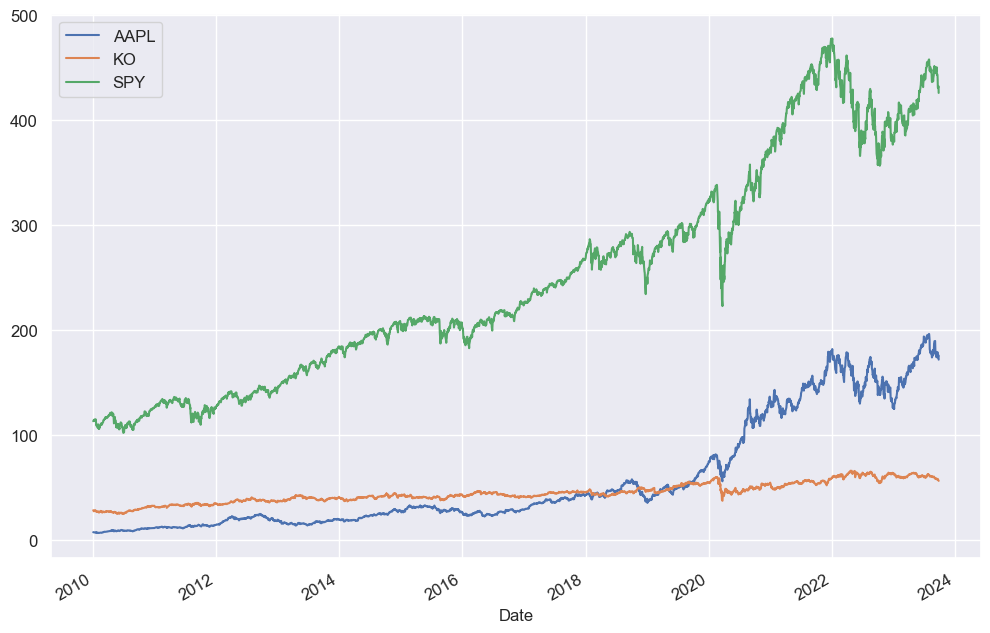

In [13]:
close.plot(
    figsize=(12, 8),
    fontsize=12
)
plt.legend(fontsize=12)
plt.show()

In [17]:
# close.tail()
close.div(close.iloc[0])

,AAPL,KO,SPY
Date,,,
2010-01-04,1.000000,1.000000,1.000000
2010-01-05,1.001729,0.987903,1.002647
2010-01-06,0.985795,0.987553,1.003353
2010-01-07,0.983973,0.985098,1.007588
2010-01-08,0.990514,0.966865,1.010941
...,...,...,...
2023-09-20,22.960236,2.049088,3.870467
2023-09-21,22.756132,2.017532,3.806494
2023-09-22,22.868650,2.019635,3.797935


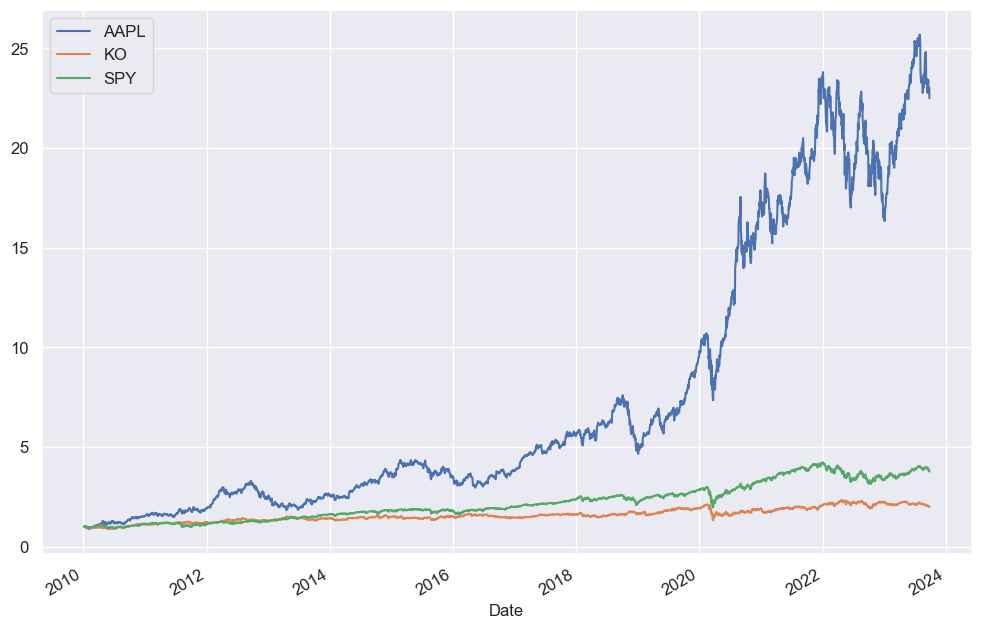

In [20]:
# normalize
# normclose = close.div(close.iloc[0]).mul(100)
normclose = close.div(close.iloc[0])
normclose.plot(
    figsize=(12, 8),
    fontsize=12
)
plt.legend(fontsize=12)
plt.show()

# Lag, Diff, Percentage Change (Simple Return)


In [21]:
aapl = close.AAPL.copy().to_frame()
aapl.head()

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [23]:
# type(aapl)

In [24]:

aapl['Lag1'] = aapl.shift(periods=1).values

aapl['Diff'] = aapl.AAPL.sub(aapl.Lag1)
aapl['Diff2'] = aapl.AAPL.diff(periods=1)

aapl['% Change'] = aapl.AAPL.div(aapl.Lag1).sub(1).mul(100)
aapl['% Change2'] = aapl.AAPL.pct_change(periods=1).mul(100)

# del aapl['% Change2']

aapl.rename(columns={'% Change2': 'Return'}, inplace=True)

In [25]:
aapl.head(3)

,AAPL,Lag1,Diff,Diff2,% Change,Return
Date,,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.013215,0.172893,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-0.121786,-1.590632,-1.590632


In [26]:
aapl.AAPL.resample('M').last().to_frame()

,AAPL
Date,
2010-01-31,6.859286
2010-02-28,7.307857
2010-03-31,8.392857
2010-04-30,9.324643
2010-05-31,9.174286
...,...
2023-05-31,177.250000
2023-06-30,193.970001
2023-07-31,196.449997


In [29]:
# resmaple to month
# last business day
aapl.AAPL.resample('BM').last().pct_change(periods=1).mul(100).to_frame()

,AAPL
Date,
2010-01-29,NaN
2010-02-26,6.539620
2010-03-31,14.847028
2010-04-30,11.102138
2010-05-31,-1.612472
...,...
2023-05-31,4.461344
2023-06-30,9.433005
2023-07-31,1.278546


# Simple Return, Annualized mean, var, std


In [30]:
ret = aapl.AAPL.pct_change().dropna()
ret.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3455 entries, 2010-01-05 to 2023-09-26
Series name: AAPL
Non-Null Count  Dtype  
--------------  -----  
3455 non-null   float64
dtypes: float64(1)
memory usage: 54.0 KB


In [34]:
# ret.tail()

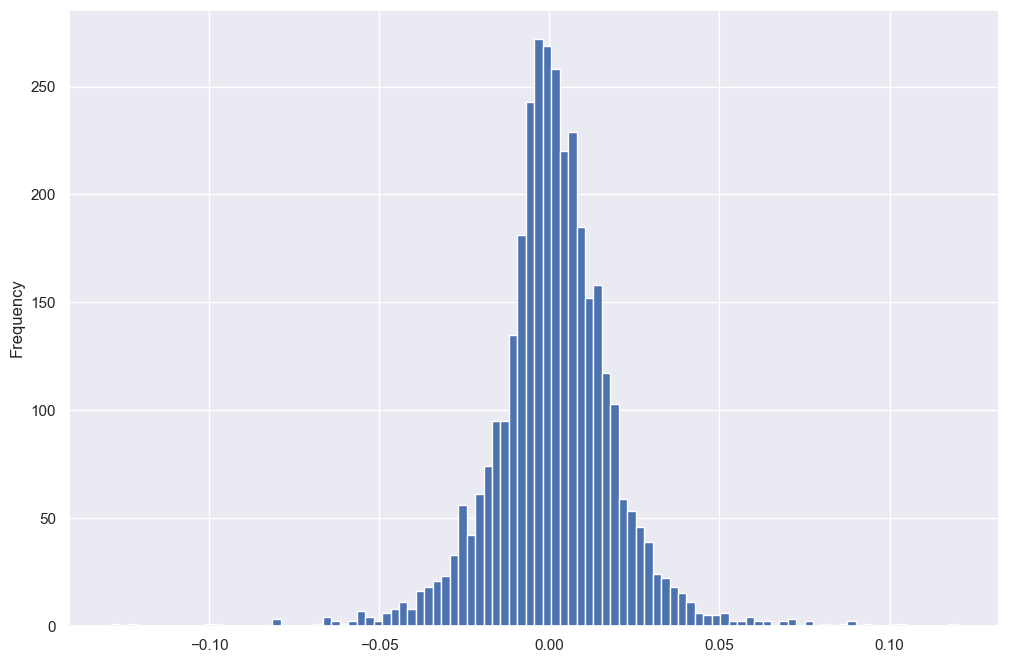

In [35]:
# looks like normal distribution
ret.plot(
    kind='hist',
    figsize=(12, 8),
    bins=100
)
plt.show()

In [38]:
daily_mean_ret = ret.mean()
daily_var_ret = ret.var()
# daily_std_ret = np.sqrt(daily_var_ret)
daily_std_ret = ret.std()

daily_mean_ret, daily_std_ret

(0.0010617231201934122, 0.0178935956658536)

In [39]:
annual_mean_ret = daily_mean_ret*252
annual_var_ret = daily_var_ret*252
annual_std_ret = daily_std_ret*np.sqrt(252)

annual_mean_ret, annual_std_ret

(0.26755422628873987, 0.28405202515555106)

# Compare Stocks Risk & Return


In [40]:
tickers = ['SPY', 'AAPL', 'KO', 'IBM', 'DIS', 'MSFT']
start_date = '2010-01-01'
end_date = '2023-09-26'

In [41]:
stocks = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  6 of 6 completed


In [42]:
stocks.head()

Adj Close                                                         \
                AAPL        DIS        IBM         KO       MSFT        SPY   
Date                                                                          
2010-01-04  6.487536  27.933920  78.345871  18.645315  23.522572  87.483215   
2010-01-05  6.498751  27.864239  77.399460  18.419764  23.530167  87.714806   
2010-01-06  6.395380  27.716167  76.896645  18.413225  23.385761  87.776535   
2010-01-07  6.383555  27.724873  76.630493  18.367458  23.142559  88.147049   
2010-01-08  6.425994  27.768427  77.399460  18.027500  23.302156  88.440407   

               Close                                    ...        Open  \
                AAPL        DIS         IBM         KO  ...         IBM   
Date                                                    ...               
2010-01-04  7.643214  32.070000  126.625237  28.520000  ...  125.411087   
2010-01-05  7.656429  31.990000  125.095604  28.174999  ...  125.889099   
2010-01-06  7.534643  31.820000  124.282982  28.165001  ...  124.933075   
2010-01-07  7.520714  31.830000  123.852776  28.094999  ...  124.158699   
2010-01-08  7.570714  31.879999  125.095604  27.575001  ...  123.393883   

                                                 Volume                     \
                   KO       MSFT         SPY       AAPL       DIS      IBM   
Date                                                                         
2010-01-04  28.580000  30.620001  112.370003  493729600  13700400  6438444   
2010-01-05  28.424999  30.850000  113.260002  601904800  10307700  7156104   
2010-01-06  28.174999  30.879999  113.519997  552160000  10709500  5863144   
2010-01-07  28.165001  30.629999  113.500000  477131200   8202100  6109268   
2010-01-08  27.730000  30.280001  113.889999  447610800   7657500  4390271   

                                           
                  KO      MSFT        SPY  
Date                                       
2010-01-04  13870400  38409100  118944600  
2010-01-05  23172400  49749600  111579900  
2010-01-06  19264600  58182400  116074400  
2010-01-07  13234600  50559700  131091100  
2010-01-08  28712400  51197400  126402800  

[5 rows x 36 columns]

In [43]:
close = stocks.loc[:, 'Close'].copy()
normclose = close.div(close.iloc[0]).mul(100)

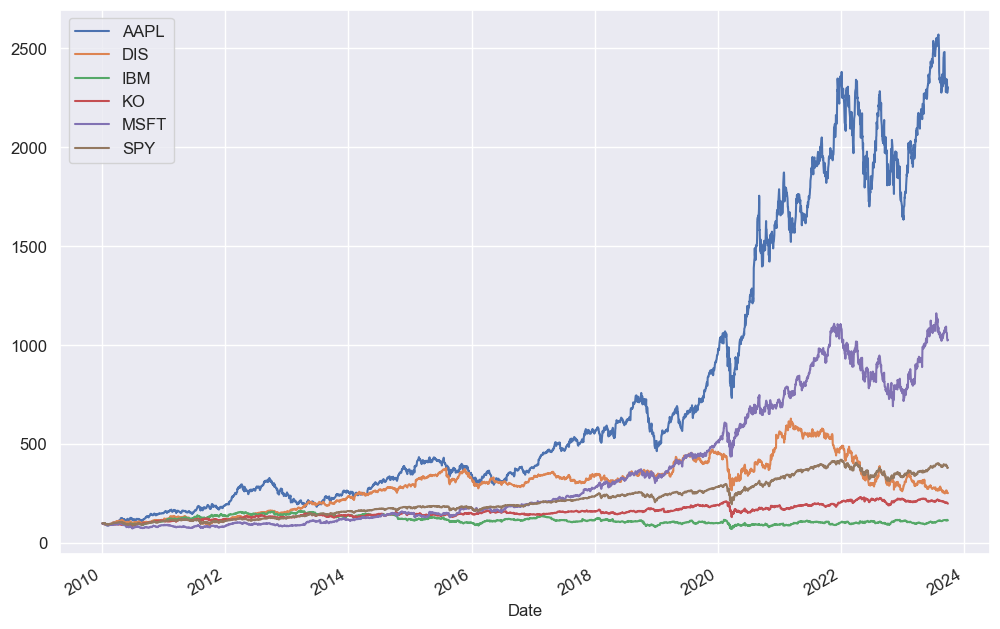

In [44]:
# normalize
normclose.plot(
    figsize=(12, 8),
    fontsize=12
)
plt.legend(fontsize=12)
plt.show()

In [45]:
ret = close.pct_change().dropna()
ret.head()

,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397


In [47]:
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,3454.0,0.001069,0.017891,-0.128647,-0.007570,0.000895,0.010512,0.119808
DIS,3454.0,0.000404,0.016466,-0.131632,-0.006889,0.000425,0.008160,0.144123
IBM,3454.0,0.000142,0.014068,-0.128507,-0.006323,0.000344,0.006991,0.113010
KO,3454.0,0.000261,0.010939,-0.096725,-0.004806,0.000447,0.005765,0.064796
MSFT,3454.0,0.000809,0.016413,-0.147390,-0.007275,0.000538,0.009174,0.142169
SPY,3454.0,0.000448,0.011009,-0.109424,-0.003927,0.000589,0.005750,0.090603


In [48]:
# annual summary
summary = ret.describe().T.loc[:, ['mean', 'std']]
summary['mean'] = summary['mean']*252  # 每日ret相加得到年化ret，这样其实不准确，所以得用到log ret
summary['std'] = summary['std']*np.sqrt(252)
summary

,mean,std
AAPL,0.269339,0.284016
DIS,0.101753,0.261385
IBM,0.035699,0.223324
KO,0.065672,0.173652
MSFT,0.203850,0.260548
SPY,0.113013,0.174758


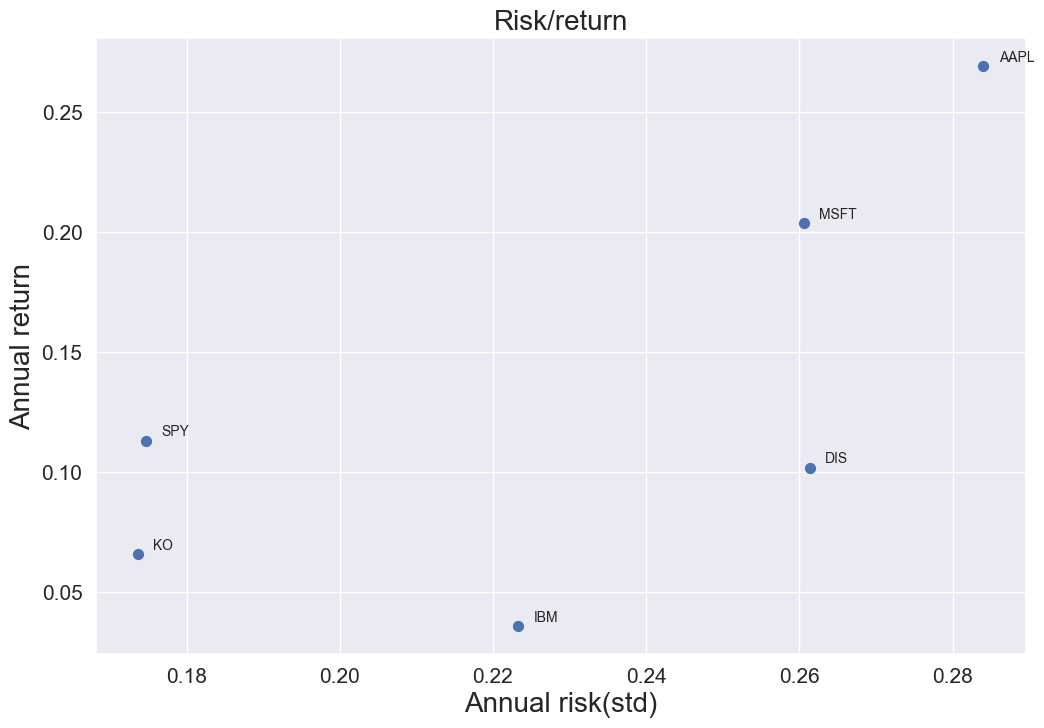

In [52]:
summary.plot.scatter(
    x='std',
    y='mean',
    figsize=(12, 8),
    s=50,
    fontsize=15
)
for i in summary.index:
    plt.annotate(
        i,
        xy=(
            summary.loc[i, 'std']+0.002,
            summary.loc[i, 'mean']+0.002
        ),
        size=10
    )
# plt.legend()
plt.xlabel('Annual risk(std)', fontsize=20)
plt.ylabel('Annual return', fontsize=20)
plt.title('Risk/return', fontsize=20)
plt.show()

# Covariance & Correlation


In [62]:
import seaborn as sns

In [63]:
ret.head()

,AAPL,DIS,IBM,KO,MSFT,SPY
Date,,,,,,
2010-01-05,0.001729,-0.002495,-0.012080,-0.012097,0.000323,0.002647
2010-01-06,-0.015906,-0.005314,-0.006496,-0.000355,-0.006137,0.000704
2010-01-07,-0.001849,0.000314,-0.003462,-0.002485,-0.010400,0.004221
2010-01-08,0.006648,0.001571,0.010035,-0.018509,0.006897,0.003328
2010-01-11,-0.008821,-0.016311,-0.010470,0.020308,-0.012720,0.001397


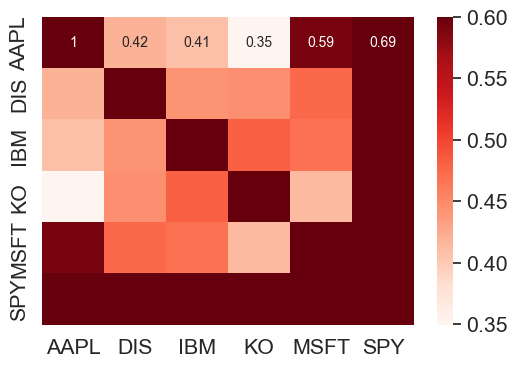

In [64]:
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.4)
sns.heatmap(
    ret.corr(),
    cmap='Reds',
    annot=True,
    annot_kws={'size': 10},
    vmax=0.6
)
plt.show()

# Simple returns and log returns

- Log returns have several advantages over simple returns. **One of the main advantages is that they are additive**. If you add the log returns of two different time periods, you get the total log return for the combined time period. In contrast, simple returns are not additive. If you add the simple returns of two different time periods, you get the total return for the combined time period, but it is not equivalent to the sum of the individual returns.

- **Log returns also have a better statistical distribution than simple returns. They are approximately normally distributed, which makes them more suitable for statistical analysis**. Simple returns, on the other hand, have a skewed distribution that makes statistical analysis more difficult.

- **In general, log returns are preferred over simple returns in financial analysis and modeling**. This is because log returns have better statistical properties and are more additive than simple returns. However, there may be situations where simple returns are more appropriate, such as when you are calculating returns for very short time periods (e.g. intraday trading) or when you need to present returns to a non-technical audience.


# SMA vs EMA

- SMA (Simple Moving Average) and EMA (Exponential Moving Average) are two popular methods for calculating moving averages of financial data.

- SMA is calculated by taking the arithmetic mean of a set of prices over a given time period. For example, the 10-day SMA is calculated by summing the closing prices of the last 10 days and dividing by 10. Each day, the oldest price in the set is dropped and the newest price is added. The resulting SMA line is a smoother representation of the price trend over the specified time period.

- EMA, on the other hand, **places more weight on recent prices and less weight on older prices**. The formula for calculating the EMA is more complex than the SMA formula and involves using a smoothing factor that gives more weight to recent data. The smoothing factor is typically expressed as a percentage, with commonly used values ranging from 2% to 30%.

- **Because EMAs give more weight to recent prices, they are more responsive to short-term price movements than SMAs. This can make them more useful for short-term trading strategies.** However, the downside of using EMAs is that they can be more volatile and may produce more false signals in choppy markets.

- **In summary, SMAs are simpler to calculate and can provide a smoother representation of long-term price trends, while EMAs give more weight to recent prices and can be more useful for short-term trading strategies. The choice of which to use depends on the specific needs and goals of the investor or trader.**


In [79]:
SPY = yf.download('SPY', start='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [80]:
spy = SPY.Close.to_frame()
spy['SMA10'] = spy.Close.rolling(window=10, min_periods=10).mean()
spy['EWMA10'] = spy.Close.ewm(span=10, min_periods=10).mean()
spy['SMA60'] = spy.Close.rolling(window=60, min_periods=60).mean()
# spy.rolling(window=10).max()
# spy.rolling(window=10).min()
# spy.rolling(window=10).median()
spy.tail(5)

,Close,SMA10,EWMA10,SMA60
Date,,,,
2023-09-21,431.390015,443.657001,441.843624,446.133668
2023-09-22,430.420013,442.147003,439.766604,446.034168
2023-09-25,432.230011,440.525003,438.396314,445.936168
2023-09-26,425.880005,438.514005,436.120622,445.646169
2023-09-27,426.049988,436.468002,434.289597,445.350502


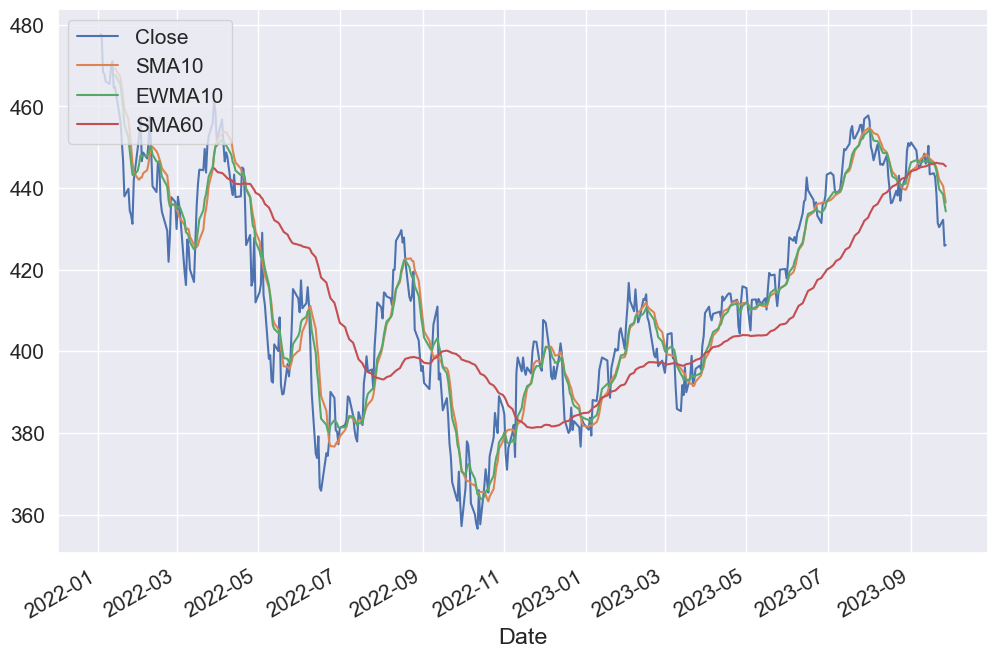

In [74]:
spy.plot(figsize=(12, 8), fontsize=15)
plt.legend(loc='upper left', fontsize=15)
plt.show()

# Back Fill & Forward Fill


In [81]:
all_days = pd.date_range(
    start='2010-12-31',
    end='2020-01-01',
    freq='D'
)
all_days

DatetimeIndex(['2010-12-31', '2011-01-01', '2011-01-02', '2011-01-03',
               '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-09',
               ...
               '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
               '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30',
               '2019-12-31', '2020-01-01'],
              dtype='datetime64[ns]', length=3289, freq='D')

In [82]:
spy = yf.download('SPY')

[*********************100%%**********************]  1 of 1 completed


In [83]:
spy.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,24.941383,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.118782,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.171997,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.438087,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.544538,531500


In [84]:
spy.index.min(), spy.index.max()

(Timestamp('1993-01-29 00:00:00'), Timestamp('2023-09-27 00:00:00'))

In [85]:
close = spy.Close.to_frame()

In [86]:
close = close.reindex(all_days)

In [87]:
close

,Close
2010-12-31,125.750000
2011-01-01,NaN
2011-01-02,NaN
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,NaN
2019-12-29,NaN
2019-12-30,321.079987
2019-12-31,321.859985


In [88]:
close.ffill()
# close.bfill()

,Close
2010-12-31,125.750000
2011-01-01,125.750000
2011-01-02,125.750000
2011-01-03,127.050003
2011-01-04,126.980003
...,...
2019-12-28,322.859985
2019-12-29,322.859985
2019-12-30,321.079987
2019-12-31,321.859985


# Cumulative Returns, Drawdowns etc


In [113]:
AAPL = yf.download('AAPL', start="2010-01-01")

[*********************100%%**********************]  1 of 1 completed


In [114]:
apple = AAPL.Close.to_frame()
apple['daily_returns'] = np.log(apple.Close.div(apple.Close.shift(1)))
apple['cum_returns'] = apple.daily_returns.cumsum().apply(np.exp)
apple.dropna(inplace=True)
apple.head()

,Close,daily_returns,cum_returns
Date,,,
2010-01-05,7.656429,0.001727,1.001729
2010-01-06,7.534643,-0.016034,0.985795
2010-01-07,7.520714,-0.001850,0.983973
2010-01-08,7.570714,0.006626,0.990514
2010-01-11,7.503929,-0.008861,0.981777


In [115]:
# apple

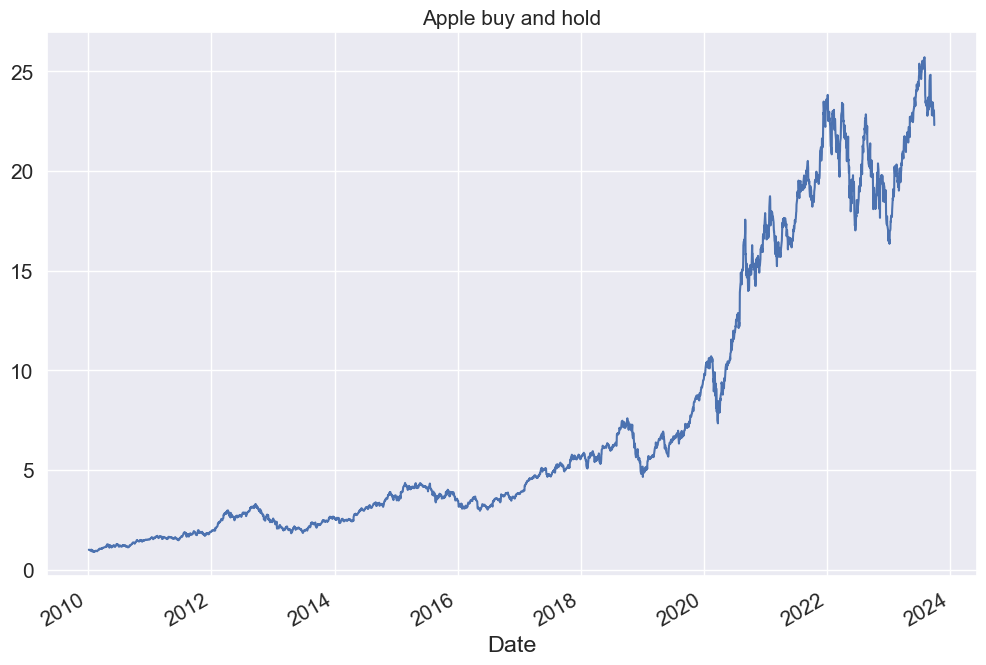

In [116]:
apple.cum_returns.plot(
    figsize=(12, 8),
    fontsize=15
)
plt.title('Apple buy and hold', fontsize=15)
plt.show()

## How to calculate drawdown


In [117]:
[i for i in dir(apple.cum_returns) if i.startswith('cum')]

['cummax', 'cummin', 'cumprod', 'cumsum']

In [118]:
apple['cum_max'] = apple.cum_returns.cummax()
apple['drawdown'] = apple['cum_max'] - apple['cum_returns']
apple['drawdown %'] = (
    apple['cum_max'] - apple['cum_returns']).div(apple['cum_max'])

In [121]:
apple.head()

,Close,daily_returns,cum_returns,cum_max,drawdown,drawdown %
Date,,,,,,
2010-01-05,7.656429,0.001727,1.001729,1.001729,0.000000,0.000000
2010-01-06,7.534643,-0.016034,0.985795,1.001729,0.015934,0.015906
2010-01-07,7.520714,-0.001850,0.983973,1.001729,0.017756,0.017726
2010-01-08,7.570714,0.006626,0.990514,1.001729,0.011214,0.011195
2010-01-11,7.503929,-0.008861,0.981777,1.001729,0.019952,0.019918


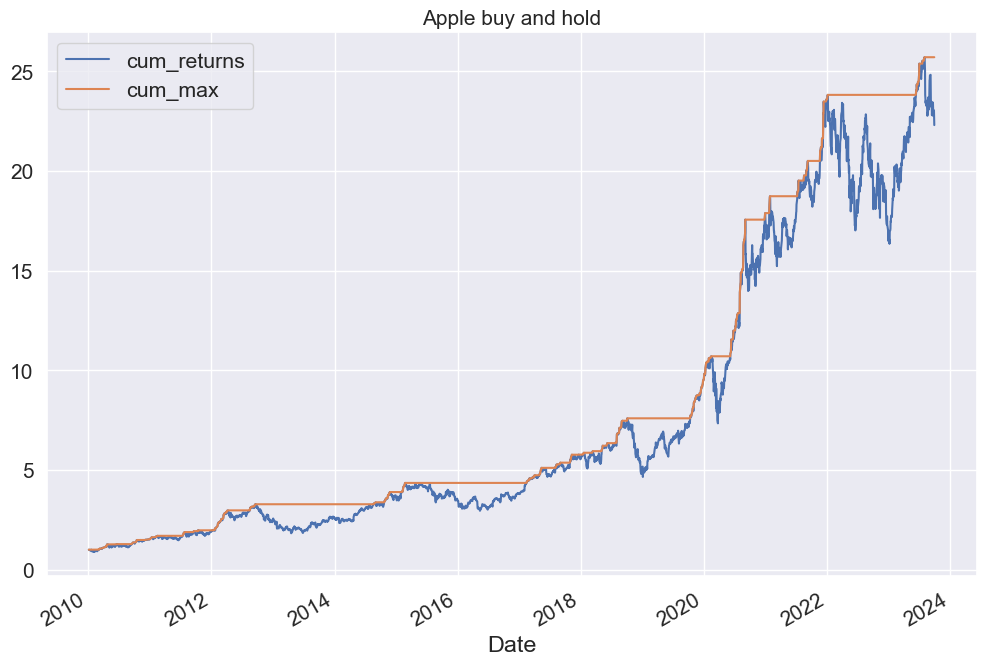

In [122]:
apple[['cum_returns', 'cum_max']].plot(
    figsize=(12, 8),
    fontsize=15
)
plt.title('Apple buy and hold', fontsize=15)
plt.show()

In [123]:
apple['drawdown %'].max()

0.44376870171441546

In [124]:
apple['drawdown %'].idxmax()

Timestamp('2013-04-19 00:00:00')

In [125]:
apple.loc[(apple.index <= apple['drawdown %'].idxmax())].tail(10)

,Close,daily_returns,cum_returns,cum_max,drawdown,drawdown %
Date,,,,,,
2013-04-08,15.221786,0.007087,1.991542,3.280688,1.289145,0.392950
2013-04-09,15.249286,0.001805,1.995140,3.280688,1.285548,0.391853
2013-04-10,15.560357,0.020194,2.035839,3.280688,1.244848,0.379447
2013-04-11,15.511786,-0.003126,2.029485,3.280688,1.251203,0.381384
2013-04-12,15.350000,-0.010485,2.008317,3.280688,1.272371,0.387836
2013-04-15,14.994643,-0.023422,1.961824,3.280688,1.318864,0.402008
2013-04-16,15.222857,0.015105,1.991683,3.280688,1.289005,0.392907
2013-04-17,14.385714,-0.056562,1.882155,3.280688,1.398533,0.426293
2013-04-18,14.001786,-0.027051,1.831924,3.280688,1.448764,0.441604


# SMA Strategy & Backtest


In [157]:
AAPL = yf.download('AAPL', start='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [158]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190948,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904068,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171814,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281006,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449295,86709100
...,...,...,...,...,...,...
2023-09-22,174.669998,177.080002,174.050003,174.789993,174.789993,56663000
2023-09-25,174.199997,176.970001,174.149994,176.080002,176.080002,46172700
2023-09-26,174.820007,175.199997,171.660004,171.960007,171.960007,64588900


## Strategy 1 : Strategy with short position


In [137]:
def get_max_drawdown(ret_series):
    cum_return = ret_series.cumsum().apply(np.exp)
    cum_max = cum_return.cummax()
    drawdown = cum_max - cum_return
    drawdown_pct = (cum_max - cum_return).div(cum_max)
    return drawdown_pct.max(), drawdown_pct.idxmax()

In [130]:
data = AAPL.Close.to_frame()

sma_s = 5
sma_l = 15

data['sma_s'] = data.Close.rolling(window=sma_s).mean()
data['sma_l'] = data.Close.rolling(window=sma_l).mean()
data['signal'] = np.where(data.sma_s > data.sma_l, 1, -1)
data['position'] = data['signal'].shift(1)

data['return_b&h'] = np.log(data.Close.div(data.Close.shift(1)))
data['return_alpha'] = data['return_b&h']*data['position']

data.dropna(inplace=True)

In [131]:
data.head()

,Close,sma_s,sma_l,signal,position,return_b&h,return_alpha
Date,,,,,,,
2022-01-24,161.619995,164.913998,171.562000,-1,-1.0,-0.004876,0.004876
2022-01-25,159.779999,162.909998,170.080000,-1,-1.0,-0.011450,0.011450
2022-01-26,159.690002,161.601999,168.746000,-1,-1.0,-0.000563,0.000563
2022-01-27,159.220001,160.544000,167.699334,-1,-1.0,-0.002948,0.002948
2022-01-28,170.330002,162.128000,167.588000,-1,-1.0,0.067451,-0.067451


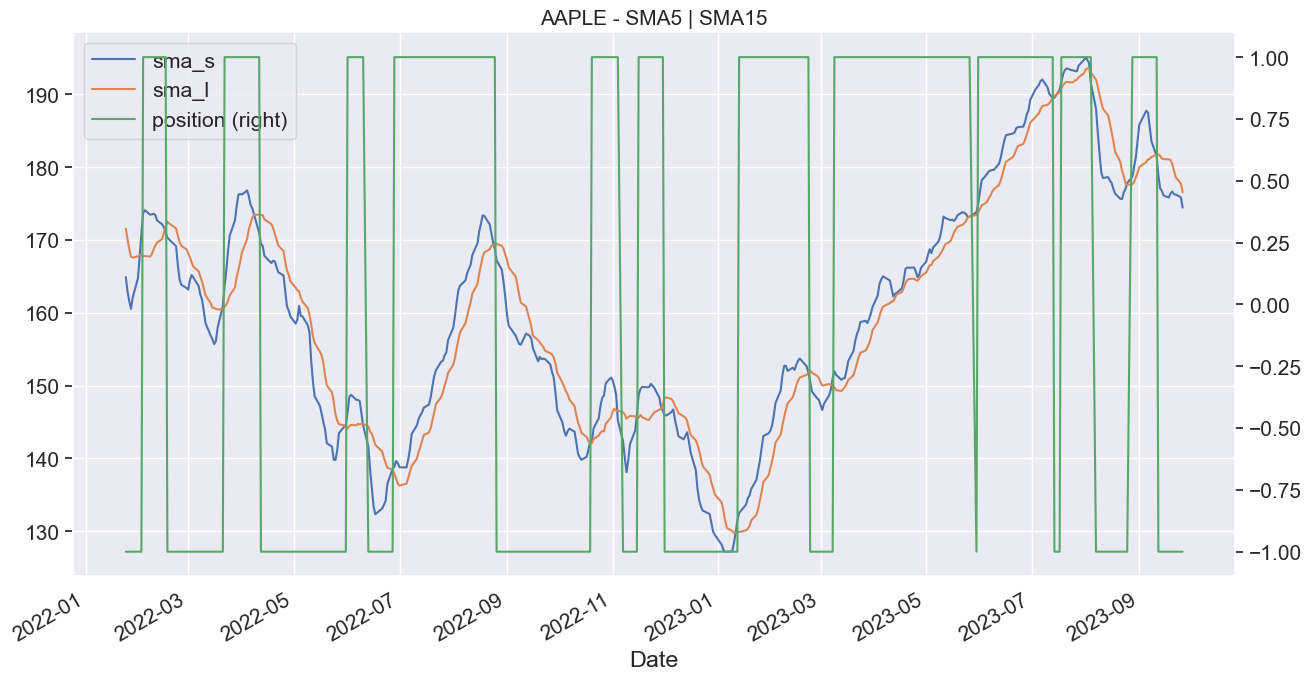

In [55]:
data.loc[:, ['sma_s', 'sma_l', 'position']].plot(
    figsize=(15, 8),
    fontsize=15,
    secondary_y='position'
)
plt.title(f'AAPLE - SMA{sma_s} | SMA{sma_l}', fontsize=15)
plt.show()

In [132]:
data[['return_b&h', 'return_alpha']].sum()

return_b&h      0.048201
return_alpha    0.534894
dtype: float64

The SMA strategy has a much higher cumulative return, which is very good


In [133]:
# return : the absolute value of $1 investment - annualised
data[['return_b&h', 'return_alpha']].sum().apply(np.exp)

return_b&h      1.049381
return_alpha    1.707268
dtype: float64

In [134]:
# risk - annualised
data[['return_b&h', 'return_alpha']].std()*np.sqrt(252)

return_b&h      0.307431
return_alpha    0.306776
dtype: float64

In [136]:
# max drawdown
get_max_drawdown(data[['return_b&h', 'return_alpha']])

(return_b&h      0.301408
 return_alpha    0.228964
 dtype: float64,
 return_b&h     2023-01-05
 return_alpha   2022-11-29
 dtype: datetime64[ns])

In [60]:
# data.loc[(data.index<="2023-01-05"), :].tail(10)

## Strategy 2 : Strategy adjusted with long bias (without short position)


In [138]:
data = AAPL.Close.to_frame()

sma_s = 5
sma_l = 15

data['sma_s'] = data.Close.rolling(window=sma_s).mean()
data['sma_l'] = data.Close.rolling(window=sma_l).mean()
data['signal'] = np.where(data.sma_s > data.sma_l, 1, 0)
data['position'] = data['signal'].shift(1)

data['return_b&h'] = np.log(data.Close.div(data.Close.shift(1)))
data['return_alpha'] = data['return_b&h']*data['position']

data.dropna(inplace=True)

In [139]:
data[['return_b&h', 'return_alpha']].sum()

return_b&h      0.048201
return_alpha    0.291547
dtype: float64

In [140]:
# return : the absolute value of $1 investment
data[['return_b&h', 'return_alpha']].sum().apply(np.exp)

return_b&h      1.049381
return_alpha    1.338497
dtype: float64

In [141]:
# risk
data[['return_b&h', 'return_alpha']].std()*np.sqrt(252)

return_b&h      0.307431
return_alpha    0.194535
dtype: float64

In [142]:
# max drawdown
get_max_drawdown(data[['return_b&h', 'return_alpha']])

(return_b&h      0.301408
 return_alpha    0.176440
 dtype: float64,
 return_b&h     2023-01-05
 return_alpha   2022-06-30
 dtype: datetime64[ns])

## Strategy written in `Class`


In [143]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [144]:
class SMABacktester():
    def __init__(
        self,
        symbol=None,
        SMA_S=None,
        SMA_L=None,
        start_date=None,
        end_date=None,
        long_bias=False
    ):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start_date = start_date
        self.end_date = end_date
        self.long_bias = long_bias
        self.data = self.get_data()

    def get_data(self):
        df = yf.download(
            self.symbol,
            start=self.start_date,
            end=self.end_date
        )

        data = df.Close.to_frame()
        return data

    def create_alpha(self, data):
        # signal
        data['SMA_S'] = data.Close.rolling(window=self.SMA_S).mean()
        data['SMA_L'] = data.Close.rolling(window=self.SMA_L).mean()
        if self.long_bias:
            data['Signal'] = np.where(data.SMA_S > data.SMA_L, 1, 0)
        else:
            data['Signal'] = np.where(data.SMA_S > data.SMA_L, 1, -1)
        data['Position'] = data['Signal'].shift(1)
        data['ret_bh'] = np.log(data.Close.div(data.Close.shift(1)))
        data['ret_alpha'] = data['ret_bh']*data['Position']
        data.dropna(inplace=True)
        return data

    def get_max_drawdown(self, ts):
        cum_return = ts.cumsum().apply(np.exp)
        cum_max = cum_return.cummax()
        drawdown = cum_max - cum_return
        drawdown_pct = (cum_max - cum_return).div(cum_max)
        return drawdown_pct.max(), drawdown_pct.idxmax()

    def backtest(self, data):
        # cumulative return
        data['cum_ret_bh'] = data['ret_bh'].cumsum().apply(np.exp)
        data['cum_ret_alpha'] = data['ret_alpha'].cumsum().apply(np.exp)

        # return
        annuallized_ret_bh = data['cum_ret_bh'].iloc[-1]-1
        annuallized_ret_alpha = data['cum_ret_alpha'].iloc[-1]-1

        # risk
        std_bh = data['ret_bh'].std()
        std_alpha = data['ret_alpha'].std()
        annuallized_risk_bh = std_bh*np.sqrt(252)
        annuallized_risk_alpha = std_alpha*np.sqrt(252)

        # max drawdown
        max_drawdown_bh = self.get_max_drawdown(data['ret_bh'])
        max_drawdown_alpha = self.get_max_drawdown(data['ret_alpha'])

        return pd.DataFrame(
            data={
                '1$ Investment': {
                    "Buy Hold": data['cum_ret_bh'].iloc[-1],
                    "SMA": data['cum_ret_alpha'].iloc[-1]
                },
                'Annualized Return': {
                    "Buy Hold": annuallized_ret_bh,
                    "SMA": annuallized_ret_alpha
                },
                'Annualized Risk': {
                    "Buy Hold": annuallized_risk_bh,
                    "SMA": annuallized_risk_alpha
                },
                'Max Drawdown': {
                    "Buy Hold": max_drawdown_bh,
                    "SMA": max_drawdown_alpha
                },
            }
        )

    def __call__(self):
        self.data = self.create_alpha(self.data)
        self.results = self.backtest(self.data)
        return self.results

    def plot_trade_entry(self):
        self.data.loc[:, ['Close', 'SMA_S', 'SMA_L', 'Position']].plot(
            figsize=(15, 8),
            fontsize=15,
            secondary_y='Position'
        )
        plt.title(
            f'{self.symbol} - SMA{self.SMA_S} | SMA{self.SMA_L}', fontsize=15)
        plt.show()

    def plot_results(self):
        title = f'{self.symbol} - SMA{self.SMA_S} | SMA{self.SMA_L}'
        self.data[['cum_ret_bh', 'cum_ret_alpha']].plot(
            title=title,
            figsize=(12, 8)
        )
        plt.show()

In [149]:
sma_strategy_long = SMABacktester(
    symbol='TSLA', SMA_S=5, SMA_L=15,
    start_date='2022-11-01',
    long_bias=True
)
sma_strategy_long()

[*********************100%%**********************]  1 of 1 completed


,1$ Investment,Annualized Return,Annualized Risk,Max Drawdown
Buy Hold,1.334702,0.334702,0.604851,"(0.4452427479445543, 2023-01-03 00:00:00)"
SMA,2.168700,1.168700,0.422707,"(0.12814964057920467, 2023-07-21 00:00:00)"


In [150]:
sma_strategy_ls = SMABacktester(
    symbol='TSLA', SMA_S=5, SMA_L=15,
    start_date='2022-11-01',
    long_bias=False
)
sma_strategy_ls()

[*********************100%%**********************]  1 of 1 completed


,1$ Investment,Annualized Return,Annualized Risk,Max Drawdown
Buy Hold,1.334702,0.334702,0.604851,"(0.4452427479445543, 2023-01-03 00:00:00)"
SMA,3.523826,2.523826,0.597877,"(0.2560129133804608, 2022-12-09 00:00:00)"


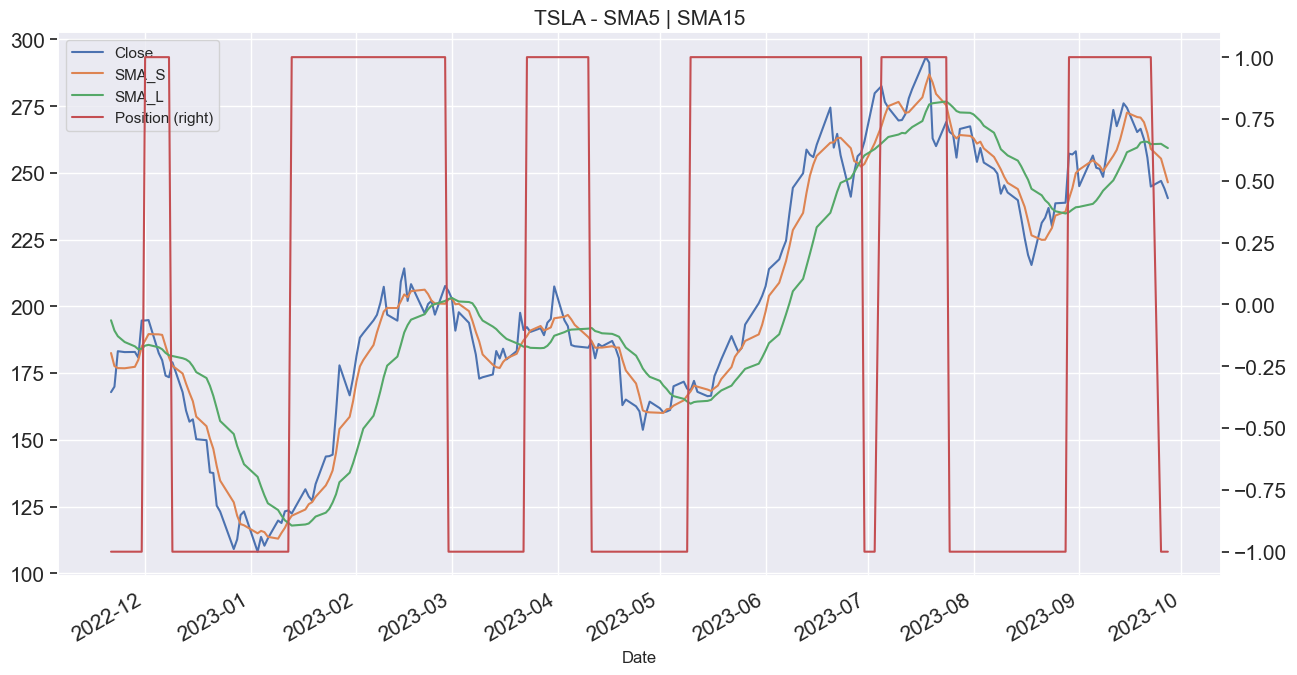

In [151]:
sma_strategy_ls.plot_trade_entry()

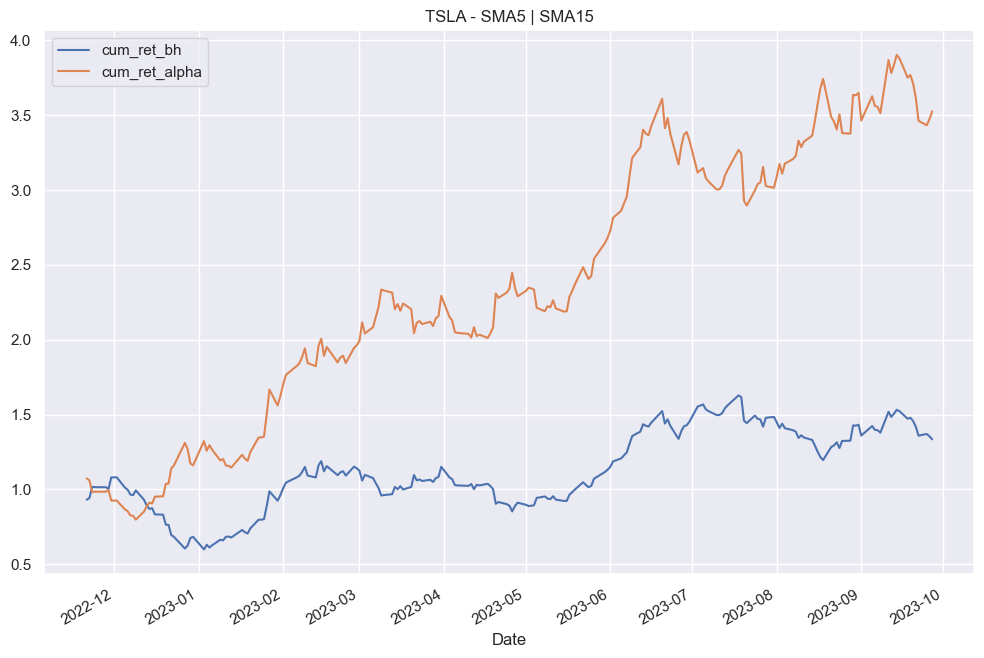

In [152]:
sma_strategy_ls.plot_results()

In [156]:
# np.info()